In [33]:
import pandas as pd
import numpy as np
import math as math

In [34]:
import matplotlib.pyplot as plt

## Data Import

In [35]:
raw_gps = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_GPS.txt"\
                     ,sep = ' ',\
                     names=['Timestamp','Speed','Lat','Long','Altitude','VA','HA','Course','DC1','DC2','DC3','DC4'],index_col=False)

In [36]:
raw_gps.head(10)

,Timestamp,Speed,Lat,Long,Altitude,VA,HA,Course,DC1,DC2,DC3,DC4
0,11.88,0.0,40.505939,-3.360690,610.3,30,201,-1.0,-1.000,-9,-9,0
1,12.90,78.8,40.506252,-3.355367,636.5,16,30,272.5,87.539,0,0,0
2,13.93,82.7,40.505802,-3.355622,605.9,4,5,273.9,1.406,0,0,0
3,14.89,85.5,40.505798,-3.355894,606.3,6,5,274.6,2.109,0,0,0
4,15.88,85.7,40.505810,-3.356182,606.9,6,5,274.9,1.055,0,0,0
5,16.88,85.5,40.505817,-3.356466,606.4,6,5,274.9,0.352,2,0,0
6,17.88,85.6,40.505829,-3.356743,606.0,6,5,274.6,0.352,2,0,0
7,18.91,85.2,40.505844,-3.357017,605.4,6,5,274.9,0.352,2,0,0
8,19.89,86.0,40.505863,-3.357301,604.9,6,5,275.3,0.703,2,3,0
9,20.87,87.2,40.505878,-3.357584,604.5,4,5,275.6,0.703,2,0,0


In [37]:
raw_acc = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt",\
                     names=['Timestamp','Bool','A_x','A_y','A_z','KF_x','KF_y','KF_z','Roll','Pitch','Yaw'],sep=' ',index_col=False)

In [38]:
raw_acc.head(10)

,Timestamp,Bool,A_x,A_y,A_z,KF_x,KF_y,KF_z,Roll,Pitch,Yaw
0,0.69,0,0.066,0.120,0.033,0.012,0.022,0.006,-1.487,-0.223,-0.373
1,0.69,0,0.083,0.150,0.049,0.049,0.088,0.028,-1.652,-0.248,-0.415
2,0.70,0,0.083,0.150,0.049,0.070,0.126,0.041,-1.652,-0.248,-0.415
3,0.70,0,0.083,0.150,0.049,0.078,0.141,0.046,-1.652,-0.248,-0.415
4,0.70,0,0.083,0.150,0.049,0.081,0.147,0.048,-1.652,-0.248,-0.415
5,0.70,0,0.083,0.150,0.049,0.082,0.149,0.048,-1.652,-0.248,-0.415
6,0.72,0,0.062,0.126,0.026,0.079,0.146,0.045,-1.652,-0.248,-0.417
7,0.82,0,-0.034,0.072,-0.068,0.028,0.109,-0.009,-1.657,-0.247,-0.437
8,0.92,0,-0.097,0.019,-0.079,-0.036,0.069,-0.051,-1.664,-0.244,-0.463
9,1.02,0,-0.110,0.048,-0.094,-0.103,0.042,-0.079,-1.672,-0.245,-0.490


In [39]:
proc_lane_det = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/PROC_LANE_DETECTION.txt",\
                     names=['Timestamp','X_pos','Phi_angle','Road_width','Lane_state'],sep=' ',index_col=False)

In [42]:
proc_lane_det.head(10)

,Timestamp,X_pos,Phi_angle,Road_width,Lane_state
0,10.89,-9.0,-9.0,-9.0,-9
1,10.94,-9.0,-9.0,-9.0,-9
2,11.02,-9.0,-9.0,-9.0,-9
3,11.09,-9.0,-9.0,-9.0,-9
4,11.15,-9.0,-9.0,-9.0,-9
5,11.18,-9.0,-9.0,-9.0,-9
6,11.21,-9.0,-9.0,-9.0,-9
7,11.26,-9.0,-9.0,-9.0,-9
8,11.30,-9.0,-9.0,-9.0,-9
9,11.32,-9.0,-9.0,-9.0,-9


In [43]:
proc_veh_det = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/PROC_VEHICLE_DETECTION.txt",\
                     names=['Timestamp','Dist_Veh','TOI','No_Of_Veh','GPS'],sep=' ',index_col=False)

In [44]:
proc_veh_det.head()

,Timestamp,Dist_Veh,TOI,No_Of_Veh,GPS
0,12.58,-1.0,-1.0,0,76.8
1,12.70,-1.0,-1.0,0,76.8
2,12.80,-1.0,-1.0,0,78.8
3,12.97,-1.0,-1.0,0,78.8
4,13.06,-1.0,-1.0,0,78.8


In [45]:
evn_lane_chg = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/EVENTS_LIST_LANE_CHANGES.txt",\
                     names=['Timestamp','Type','Lat','Lon','Duration','Threshold'],sep=' ',index_col=False)

In [46]:
evn_lane_chg.head()

,Timestamp,Type,Lat,Lon,Duration,Threshold
0,18.02,-1,40.505829,-3.356743,1.07,1.5
1,33.49,-1,40.505955,-3.360917,0.76,1.5
2,54.30,-1,40.503979,-3.367324,1.04,1.5
3,64.52,1,40.502411,-3.370460,1.20,1.5
4,81.35,1,40.499718,-3.375908,0.63,1.5


In [47]:
evn_ine = pd.read_csv("C:/Users/sprab/OneDrive/Documents/Study/University/AP/Code/20151111123124-25km-D1-NORMAL-MOTORWAY/EVENTS_INERTIAL.txt",\
                     names=['Timestamp','Type','Level','Lat','Lon','Date'],sep=' ',index_col=False)

In [48]:
evn_ine.tail()

,Timestamp,Type,Level,Lat,Lon,Date
1,412.98,1,1,40.466385,-3.482521,20151111123817
2,439.68,1,1,40.464958,-3.487640,20151111123844
3,443.65,1,1,40.464298,-3.487936,20151111123847
4,447.46,1,1,40.463764,-3.487613,20151111123851
5,453.62,2,2,40.463558,-3.486553,20151111123857


## Data Manipulation

### Downscale the data

In [58]:
def downscale_data(X,len,freq):
    i=list(range(0,len,freq))
    N=freq
    running_mean = np.convolve(X, np.ones(N) / float(N), 'valid')
    downscaled_data =running_mean[i]
    return downscaled_data

Raw Acceleration Downscale

In [54]:
i=list(range(0,8660,10))
df = pd.DataFrame(raw_acc['Timestamp'][i]//1,
               columns =['Timestamp'])
df['A_x']=downscale_data(raw_acc['A_x'],8660,10)
df['A_y']=downscale_data(raw_acc['A_y'],8660,10)
df['A_z']=downscale_data(raw_acc['A_z'],8660,10)
df.head()

,Timestamp,A_x,A_y,A_z
0,0.0,0.0302,0.1135,0.0063
10,1.0,-0.0292,0.0770,-0.0853
20,2.0,-0.0260,-0.1426,-0.0595
30,3.0,-0.0143,-0.2362,-0.0479
40,4.0,-0.0388,-0.2464,-0.0715


Raw GPS - Convert timestamp to whole numbers

In [49]:
raw_gps.head()

,Timestamp,Speed,Lat,Long,Altitude,VA,HA,Course,DC1,DC2,DC3,DC4
0,11.88,0.0,40.505939,-3.360690,610.3,30,201,-1.0,-1.000,-9,-9,0
1,12.90,78.8,40.506252,-3.355367,636.5,16,30,272.5,87.539,0,0,0
2,13.93,82.7,40.505802,-3.355622,605.9,4,5,273.9,1.406,0,0,0
3,14.89,85.5,40.505798,-3.355894,606.3,6,5,274.6,2.109,0,0,0
4,15.88,85.7,40.505810,-3.356182,606.9,6,5,274.9,1.055,0,0,0


In [55]:
df_gps = raw_gps[['Timestamp','Speed']].copy()
df_gps['Timestamp'] = df_gps['Timestamp']//1
df_gps.head()

,Timestamp,Speed
0,11.0,0.0
1,12.0,78.8
2,13.0,82.7
3,14.0,85.5
4,15.0,85.7


In [56]:
df=df.merge(df_gps,how='left',on=['Timestamp'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  869 non-null    float64
 1   A_x        869 non-null    float64
 2   A_y        869 non-null    float64
 3   A_z        869 non-null    float64
 4   Speed      855 non-null    float64
dtypes: float64(5)
memory usage: 40.7 KB


Event Lane Change - Convert timestamp to whole number & Add the columns to main dataframe df

In [60]:
evn_lane_chg.head()

,Timestamp,Type,Lat,Lon,Duration,Threshold
0,18.02,-1,40.505829,-3.356743,1.07,1.5
1,33.49,-1,40.505955,-3.360917,0.76,1.5
2,54.30,-1,40.503979,-3.367324,1.04,1.5
3,64.52,1,40.502411,-3.370460,1.20,1.5
4,81.35,1,40.499718,-3.375908,0.63,1.5


In [61]:
df_lane_chg = evn_lane_chg[['Timestamp','Type']].copy()
df_lane_chg['Timestamp'] = df_lane_chg['Timestamp']//1
df_lane_chg.rename(columns={"Type": "Lane_Change"},inplace=True)
df_lane_chg.head()

,Timestamp,Lane_Change
0,18.0,-1
1,33.0,-1
2,54.0,-1
3,64.0,1
4,81.0,1


In [62]:
df=df.merge(df_lane_chg,how='left',on=['Timestamp'])

In [63]:
df.head()

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change
0,0.0,0.0302,0.1135,0.0063,NaN,NaN
1,1.0,-0.0292,0.0770,-0.0853,NaN,NaN
2,2.0,-0.0260,-0.1426,-0.0595,NaN,NaN
3,3.0,-0.0143,-0.2362,-0.0479,NaN,NaN
4,4.0,-0.0388,-0.2464,-0.0715,NaN,NaN


In [82]:
df['Timestamp']=df['Timestamp'].astype('int')

Proc Vehicle Detection - Adjust the timestamp and add the columns to main dataframe df

In [64]:
proc_veh_det.head()

,Timestamp,Dist_Veh,TOI,No_Of_Veh,GPS
0,12.58,-1.0,-1.0,0,76.8
1,12.70,-1.0,-1.0,0,76.8
2,12.80,-1.0,-1.0,0,78.8
3,12.97,-1.0,-1.0,0,78.8
4,13.06,-1.0,-1.0,0,78.8


In [78]:
df_veh_det = proc_veh_det[['Timestamp','Dist_Veh','No_Of_Veh','GPS']].copy()
df_veh_det['Timestamp']=df_veh_det['Timestamp'].astype('int')
df_veh_det.head()

,Timestamp,Dist_Veh,No_Of_Veh,GPS
0,12,-1.0,0,76.8
1,12,-1.0,0,76.8
2,12,-1.0,0,78.8
3,12,-1.0,0,78.8
4,13,-1.0,0,78.8


In [79]:
x1=df_veh_det['Timestamp']
x1.drop_duplicates(inplace=True)
x2=df_veh_det.groupby('Timestamp')['No_Of_Veh'].max()
x3=df_veh_det.groupby('Timestamp')['Dist_Veh'].mean()
x4=df_veh_det.groupby('Timestamp')['GPS'].mean()

In [80]:
x1 = list(x1)
x2 = list(x2)
x3 = list(x3)
x4 = list(x4)

In [81]:
d = {'Timestamp': x1, 'No_Of_Veh': x2, 'Dist_Veh':x3,'GPS':x4}
df_veh_det2 = pd.DataFrame(data=d)
df_veh_det2.head()

,Timestamp,No_Of_Veh,Dist_Veh,GPS
0,12,0,-1.0,77.800000
1,13,0,-1.0,79.287500
2,14,0,-1.0,83.050000
3,15,0,-1.0,85.540000
4,16,0,-1.0,85.655556


In [83]:
df=df.merge(df_veh_det,how='left',on='Timestamp')

In [86]:
df.tail(10)

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,Dist_Veh,No_Of_Veh,GPS
4571,869,-0.0253,0.0396,-0.0362,58.6,NaN,-1.0,1.0,61.7
4572,871,-0.0218,0.0462,-0.0262,51.2,NaN,-1.0,1.0,56.2
4573,871,-0.0218,0.0462,-0.0262,51.2,NaN,-1.0,1.0,56.2
4574,871,-0.0218,0.0462,-0.0262,51.2,NaN,-1.0,1.0,56.2
4575,872,-0.0161,0.0463,0.0238,48.9,NaN,-1.0,1.0,51.2
4576,872,-0.0161,0.0463,0.0238,48.9,NaN,-1.0,1.0,51.2
4577,872,-0.0161,0.0463,0.0238,48.9,NaN,-1.0,1.0,51.2
4578,872,-0.0161,0.0463,0.0238,48.9,NaN,-1.0,1.0,51.2
4579,873,-0.0158,0.0077,-0.0006,47.6,NaN,NaN,NaN,NaN
4580,874,-0.0175,-0.0071,-0.0137,47.1,NaN,NaN,NaN,NaN


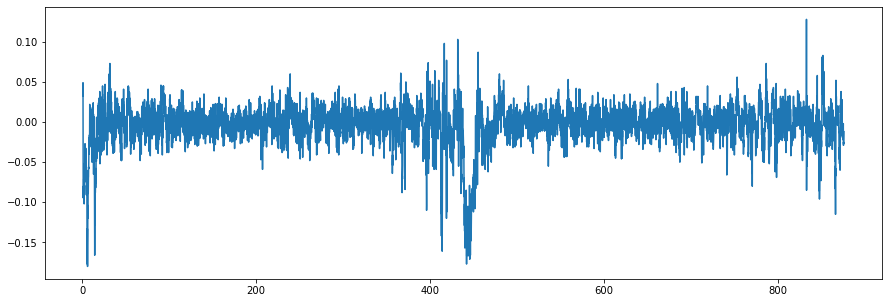

In [23]:
#Raw Acceleration
plt.figure(figsize=(15,5)) 
plt.plot(raw_acc['Timestamp'],raw_acc['A_z'])
plt.show()

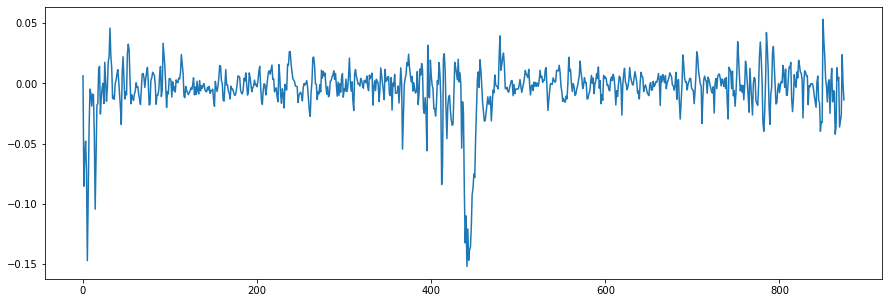

In [28]:
#Acceleration after downscale
plt.figure(figsize=(15,5)) 
plt.plot(df['Timestamp'],df['A_z'])
plt.show()

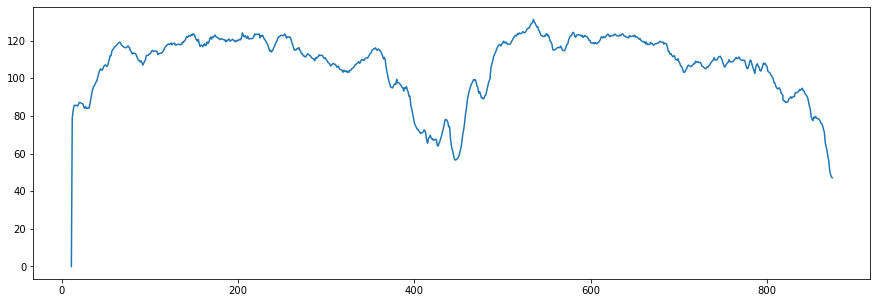

In [32]:
#Raw GPS
plt.figure(figsize=(15,5)) 
plt.plot(df_gps['Timestamp'],df_gps['Speed'])
plt.show()